<a href="https://colab.research.google.com/github/maxilexow/PDI-2022/blob/main/Lexow_Tp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# mount drive
from google.colab import drive
drive.mount('/content/gdrive')
images_dir = '/content/gdrive/My Drive/PDI/Tp4'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

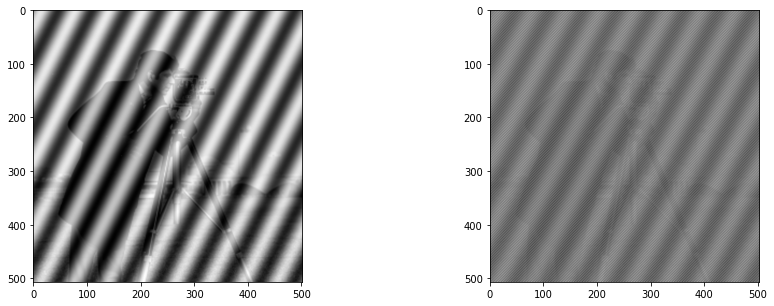

In [3]:
# USAR ESTO PARA LEER IMAGENES DE LA CARPETA DE DRIVE
img_rgb = imageio.imread(f"{images_dir}/camarografo.png")/255

# USAR ESTO PARA LEER IMAGENES DE LA WEB
#img_rgb = imageio.imread("https://www.purina.es/sites/default/files/2021-12/6_El_comportamiento_de_los_gatitos%20%282%29_0.jpg")/255

img = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img,'gray')

Transformada Discreta de Fourier

1. Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. Mostrar el módulo en escala logarítmica
2. Encuentre una transformada para la amplitud y una para la fase que permita guardar el espectro en imágenes de 8 bit perdiendo la menor cantidad de información posible

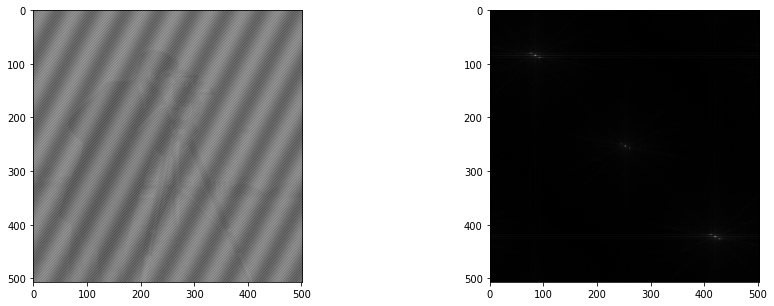

In [7]:
# fooplot
# np.fft.fft2 help
X = np.fft.fftshift(np.fft.fft2(img))   # Hago la transformada de fourier 2d y la centro (eso lo hace fftshift)

# Defino filas N y columnas M
N, M = img.shape

# Tomo el logaritmo natural del array X:
#Xm = 20 * np.log(10 + 1000 * np.abs(X)) 

Xm = np.abs(X)**(1/2) 

Xm = Xm/Xm.max()  # Normalizo Xm
Xp = np.angle(X)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img,'gray')
axes[1].imshow(Xm, 'gray')
plt.imsave(f"{images_dir}/espectro.png", Xm, cmap = 'gray')

3. Implementar la transformada inversa que convierta el espectro guardado en imágenes de 8 bit en la imagen original

0.17467287783784147


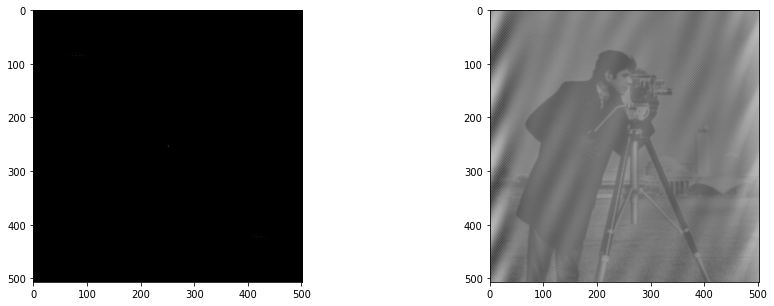

In [11]:
# Para hacer la antitransformada escribo A en función de módulo y fase

X = imageio.imread(f"{images_dir}/espectro.png")[:,:,0]   # Leo el espectro de drive

Xm = np.abs(X)    # Asigno el módulo a Xm

Xm = Xm/Xm.max()  # Normalizo Xm

#Xm = np.power(np.exp(1),Xm/20) - 50  # Hago la operación inversa, divido por 20, hago e elevado a Xm, y resto 50
Xm = Xm**2

A = Xm * (np.cos(Xp) + np.sin(Xp)*1j)   # A es la matriz transformada con módulo y fase

img_recuperada = yiq2rgb(np.abs(np.fft.ifft2(A))) # Hago la transformada inversa

mse = (np.square(img - img_recuperada)).mean()
print(mse)

# Ploteo el espectro a la izquierda, y la imagen recuperada a la derecha
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(Xm,'gray')
axes[1].imshow(img_recuperada, 'gray')
plt.imsave(f"{images_dir}/imagen_recuperada.png", img_recuperada, cmap = 'gray')
